# Diseño de filtros FIR con fase lineal usando el método de la ventana

## Ventana rectangular

Para diseñar un filtro de orden $M$, usamos una ventana rectangular $w(n) = 1$ para $n= 0, 1, \ldots, M-1$ y $w(n) = 0$ para el resto de los casos.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, sinc, log10
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann
%matplotlib inline

En este ejemplo diseñaremos un filtro pasabajos con frecuencia de corte $\omega_c = \pi/4$.

In [2]:
omega_c = pi / 4

Veremos el efecto que tiene el orden de la ventana. Consideramos los valores $M=9$ y $M=17$. La siguiente función calcula la respuesta impulso $h(n)$ del filtro usando una ventana rectangular, para un valor dado de $M$ y $\omega_c$.

In [3]:
def make_hd(M, omega_c, window='rect'):
    L = 64
    n = np.arange(L)
    w = np.zeros(L)
    if window == 'rect':
        w[:M] = 1
    elif window == 'hann':
        w[:M] = hann(M, True)
    N = 1024
    W = fft(w, N)
    omega = np.linspace(-pi, pi, N)

    hd = (omega_c / pi) * sinc(omega_c * (n - (M-1)/2) / pi)

    h = w * hd
    H = fft(h, N)

    return omega, n, w, W, H

Text(0.5, 1.0, '$H(\\omega)$ y $H_d(\\omega)$, $M=17$')

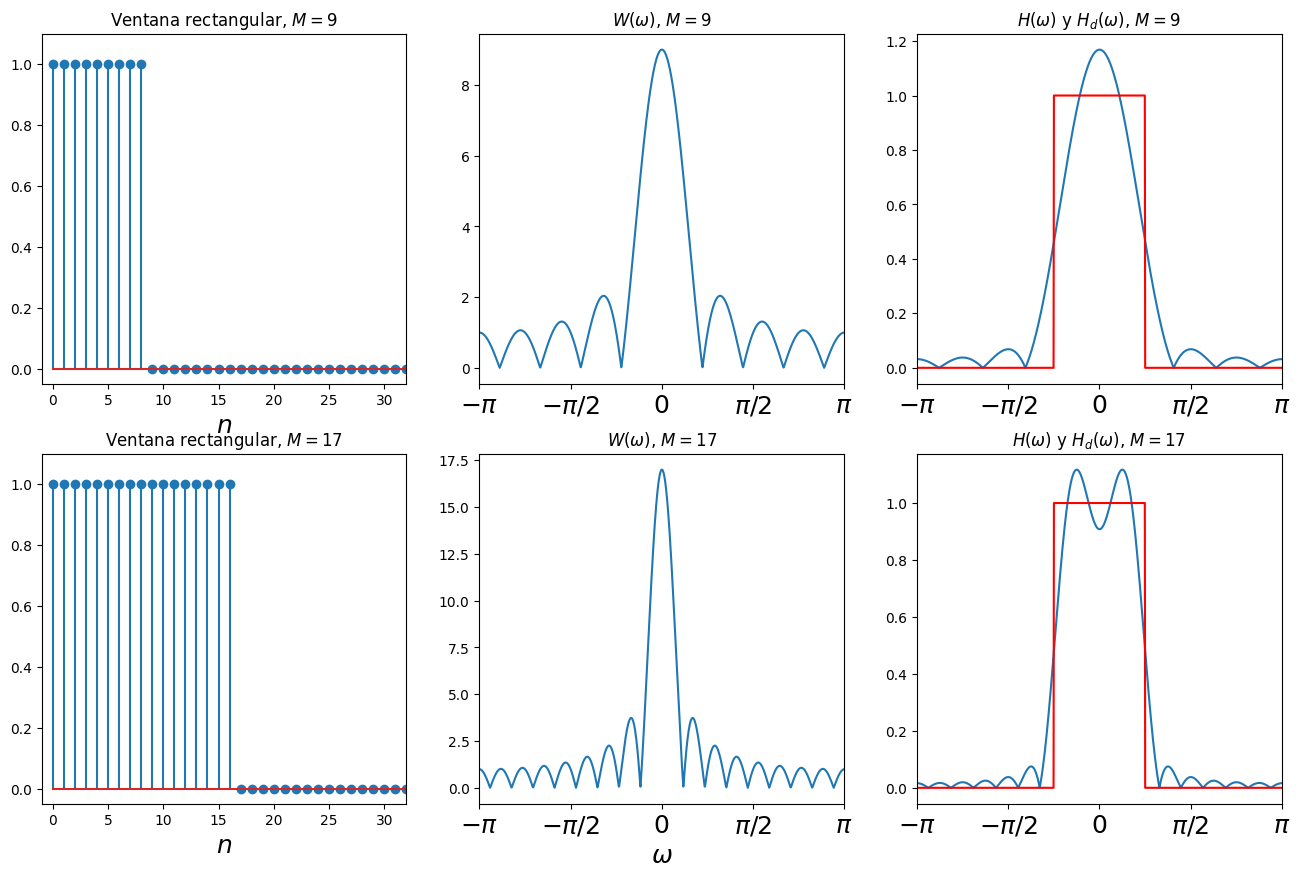

In [4]:
_, axs = plt.subplots(2, 3, figsize=(16,10))
M = 9
omega, n, w, W, H = make_hd(M, omega_c)
HD = (abs(omega) <= omega_c).astype('float')
axs[0,0].stem(n, w)
axs[0,1].plot(omega, np.abs(fftshift(W)))
axs[0,2].plot(omega, np.abs(fftshift(H)))
axs[0,2].plot(omega, HD, color='r')
axs[0,0].set_xlabel('$n$', fontsize=18)
axs[0,0].set_ylim(-0.05, 1.1)
axs[0,0].set_xlim(-1, 32)
axs[0,0].set_title('Ventana rectangular, $M=%d$' % M)
#axs[0,1].set_xlabel(r'$\omega$', fontsize=18)
axs[0,1].set_xlim(-pi, pi)
axs[0,1].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
axs[0,1].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[0,1].set_title('$W(\omega)$, $M=%d$' % M)
axs[0,2].set_xlim(-pi, pi)
axs[0,2].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
axs[0,2].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[0,2].set_title('$H(\omega)$ y $H_d(\omega)$, $M=%d$' % M)

M = 17
omega, n, w, W, H = make_hd(M, omega_c)
axs[1,0].stem(n, w)
axs[1,1].plot(omega, np.abs(fftshift(W)))
axs[1,2].plot(omega, np.abs(fftshift(H)))
axs[1,2].plot(omega, HD, color='r')
axs[1,0].set_xlabel('$n$', fontsize=18)
axs[1,0].set_ylim(-0.05, 1.1)
axs[1,0].set_xlim(-1, 32)
axs[1,0].set_title('Ventana rectangular, $M=%d$' % M)
axs[1,1].set_xlabel(r'$\omega$', fontsize=18)
axs[1,1].set_xlim(-pi, pi)
axs[1,1].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
axs[1,1].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[1,1].set_title('$W(\omega)$, $M=%d$' % M)
axs[1,2].set_xlim(-pi, pi)
axs[1,2].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
axs[1,2].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[1,2].set_title('$H(\omega)$ y $H_d(\omega)$, $M=%d$' % M)

## Efecto del tipo de ventana

Comparemos la ventana rectangular con la ventana Hann

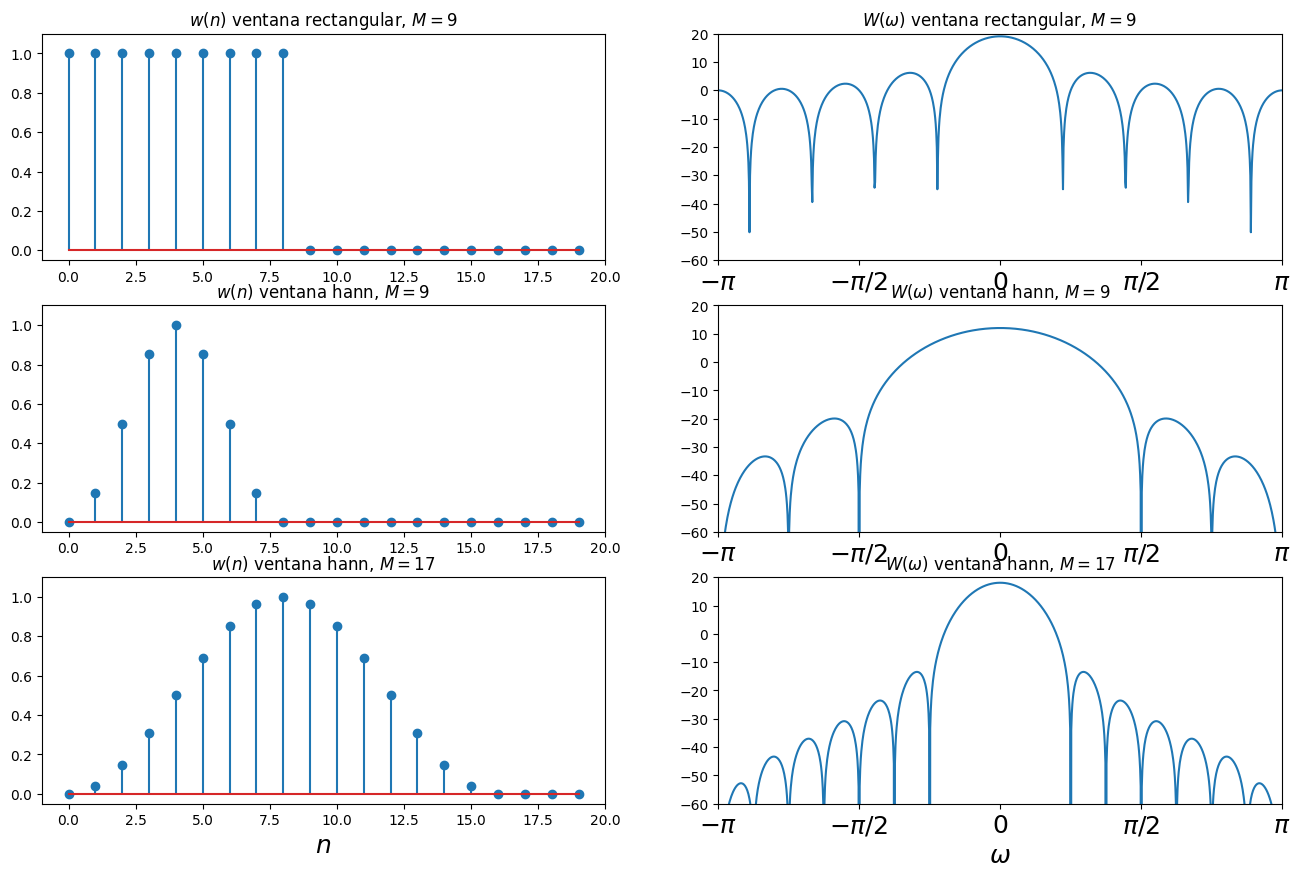

In [5]:
M = 9
N = 20
n = np.arange(N)
w_rect = np.zeros(N)
w_rect[:M] = 1
w_hann_9 = np.zeros(N)
w_hann_9[:M] = hann(M, True)
M = 17
w_hann_17 = np.zeros(N)
w_hann_17[:M] = hann(M, True)
W_rect = 20 * log10(np.abs(fftshift(fft(w_rect, 1024))))
tmp = fft(w_hann_9, 1024)
tmp[tmp == 0] = 1e-16 # To avoid dividing by zero when computing dB
W_hann_9 = 20 * log10(np.abs(fftshift(tmp)))
tmp = fft(w_hann_17, 1024)
tmp[tmp == 0] = 1e-16 # To avoid dividing by zero when computing dB
W_hann_17 = 20 * log10(np.abs(fftshift(tmp)))

_, axs = plt.subplots(3,2, figsize=(16, 10))
axs[0,0].stem(n, w_rect)
axs[1,0].stem(n, w_hann_9)
axs[2,0].stem(n, w_hann_17)

omega = np.linspace(-pi, pi, 1024)
axs[0,1].plot(omega, W_rect)
axs[1,1].plot(omega, W_hann_9)
axs[2,1].plot(omega, W_hann_17)

for i, M, t in zip(range(3), [9, 9, 17], ['rectangular', 'hann', 'hann']):
    axs[i,1].set_ylim(-60, 20)
    axs[i,0].set_xlim(-1, N)
    axs[i,0].set_ylim(-0.05, 1.1)

    axs[i,1].set_xlim(-pi, pi)
    axs[i,1].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
    axs[i,1].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
    axs[i,1].set_title('$W(\omega)$ ventana %s, $M=%d$' % (t, M))
    axs[i,0].set_title('$w(n)$ ventana %s, $M=%d$' % (t, M))


axs[2,1].set_xlabel(r'$\omega$', fontsize=18)
axs[2,0].set_xlabel('$n$', fontsize=18)
M = 17
N = 34
n = np.arange(N)
w_rect = np.zeros(N)
w[:M] = 1 
w_hann = np.zeros(N)
w_hann[:M] = hann(M, True)

Comparemos la respuesta de los filtros con distintas ventanas

Text(0.5, 0, '$\\omega$')

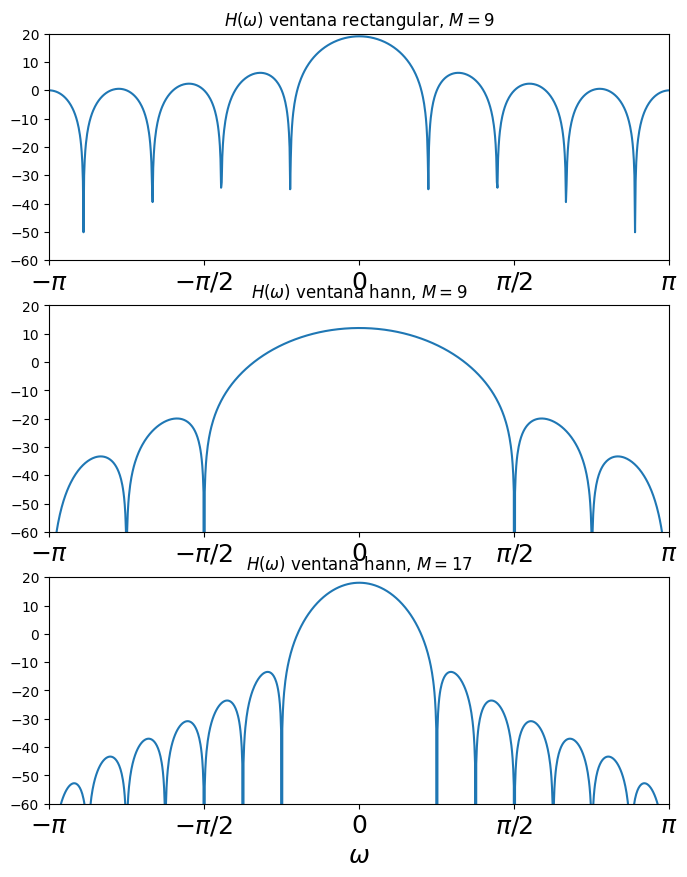

In [6]:
omega_c = pi / 4
M = 9
omega, n, w, W_rect, H = make_hd(M, omega_c, 'rect')
omega, n, w, W_hann_9, H = make_hd(9, omega_c, 'hann')
omega, n, w, W_hann_17, H = make_hd(17, omega_c, 'hann')

_, axs = plt.subplots(3, 1, figsize=(8,10))

axs[0].plot(omega, 20*log10(np.abs(fftshift(W_rect))))
W_hann_9[W_hann_9 == 0] = 1e-16
W_hann_17[W_hann_17 == 0] = 1e-16
axs[1].plot(omega, 20*log10(np.abs(fftshift(W_hann_9))))
axs[2].plot(omega, 20*log10(np.abs(fftshift(W_hann_17))))

for i, M, t in zip(range(3), [9, 9, 17], ['rectangular', 'hann', 'hann']):
    axs[i].set_ylim(-60, 20)

    axs[i].set_xlim(-pi, pi)
    axs[i].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
    axs[i].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
    axs[i].set_title('$H(\omega)$ ventana %s, $M=%d$' % (t, M))

axs[2].set_xlabel('$\omega$', fontsize=18)
